# OpenEO for ESA CCI Biomass Data

The Biomass collections can be browsed using the CCI STAC browser at https://radiantearth.github.io/stac-browser/#/external/api.stac.164.30.69.113.nip.io/collections/cci_openeo, where we can see there are 10 individual OpenEO data cubes corresponding to different parts of the same dataset. A list of these DRS' can be found below (as of 29/09/2025)

- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED.6-0.100m-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2010-2007-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2016-2015-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2017-2016-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2018-2017-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2019-2018-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2020-2010-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2020-2019-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2021-2020-fv6.0.openeo
- ESACCI.BIOMASS.yr.L4.AGB.multi-sensor.multi-platform.MERGED-DIFF-100m-2022-2021-fv6.0.openeo

The comparison (DIFF) datasets are comparing between two specific years, and can be accessed individually using the following OpenEO local processing notebook.

For more info on local processing with OpenEO visit: https://open-eo.github.io/openeo-python-client/cookbook/localprocessing.html

## OpenEO Local Processing

Make sure you have used one of the requirements files from this repository (either for python3.10 or python3.11) to install all necessary packages for OpenEO local processing.

First we import the local connection processor from OpenEO and configure for local processing. We can also import matplotlib for plotting some example data later.

In [2]:
from openeo.local import LocalConnection
import matplotlib.pyplot as plt

connection = LocalConnection('./')

Then we can configure for the CCI OpenEO endpoint using the following cell. Note that we have selected a specific DRS from the options above, which are also listed in the STAC browser at the URL above, however we are using the lower-case DRS identifier as STAC requires lower-case collection names in all cases.

In [ ]:
url = 'https://api.stac.164.30.69.113.nip.io/collections/esacci.biomass.yr.l4.agb.multi-sensor.multi-platform.merged-diff-100m-2010-2007-fv6.0.openeo'
url = url.lower()

spatial_extent={'north':58, 'south':50, 'west': -13, 'east':3}
temporal_extent = ['2009-01-01','2010-01-01']

datacube = connection.load_stac(url=url, bands=['QF','QF_SD'], spatial_extent=spatial_extent, temporal_extent=temporal_extent)
dataset = datacube.execute()


The selections applied here for spatial and temporal extents MUST be applied before the datacube is `executed`, otherwise Dask will attempt to reserve memory for the entire collection!

In addition, the bands specified here can be found in the collection page's `Spectral Bands` section if you scroll down on the browser. Currently these are required to inform the openEO client about which data assets you're trying to load. If these are not specified you will be met by an error message stating the current limitation that OpenEO cannot load a collection without specifying the current bands. OpenEO will let you know the available bands if you provide any incorrect value to bands.

We are then able to execute our datacube selection and receive an xarray dataset object, as seen below:

In [4]:
dataset

<xarray.DataArray (bands: 2, time: 1, latitude: 9000, longitude: 18000)> Size: 1GB
dask.array<getitem, shape=(2, 1, 9000, 18000), dtype=float32, chunksize=(1, 1, 9000, 18000), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 72kB 58.0 58.0 58.0 58.0 ... 50.0 50.0 50.0
  * longitude    (longitude) float64 144kB -13.0 -13.0 -13.0 ... 2.998 2.999 3.0
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2007-01-01
  * bands        (bands) object 16B 'QF' 'QF_SD'

We can then select one of the datacube bands to obtain a 2d array for plotting.

For more information on what these bands mean, and other parameters about the dataset, make sure to read the CEDA Catalogue record that is linked from the OpenEO collection record, which also links to the product user guide.

In [7]:
bio = dataset.sel(bands='QF')
bio

<xarray.DataArray (time: 1, latitude: 9000, longitude: 18000)> Size: 648MB
dask.array<getitem, shape=(1, 9000, 18000), dtype=float32, chunksize=(1, 9000, 18000), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 72kB 58.0 58.0 58.0 58.0 ... 50.0 50.0 50.0
  * longitude    (longitude) float64 144kB -13.0 -13.0 -13.0 ... 2.998 2.999 3.0
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2007-01-01
    bands        <U2 8B 'QF'

Finally we can compute a simple plot of our data selection over the UK for this biomass difference dataset. Note that OpenEO has added metadata/axes to this plot based on the information in the data cube. The plot labels and title can be adjusted using typical matplotlib syntax. See the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) for a full description of how to customise the plot.

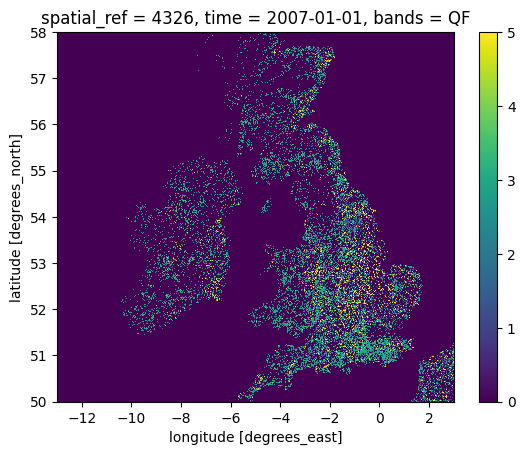

In [6]:
bio.plot()